<a href="https://colab.research.google.com/github/AlvaroMAlves/testrepo/blob/main/LH_CD_Alvaro_Martins_Alves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Preços de Revenda de Carros

## Importar as bibliotecas e funções necessárias

In [ ]:
import pandas as pd               # Pandas: manipulação de dados tabulares
import seaborn as sns             # Seaborn: visualização de dados
import matplotlib.pyplot as plt   # Matplotlib: criar gráficos
import re                         # Módulo 're': trabalhar com expressões regulares
import numpy as np                # NumPy: suporte a arrays e operações matemáticas
import scipy.stats as stats       # SciPy: funções estatísticas
import joblib                     # Joblib: salvar e carregar objetos Python

# Scikit-learn: ferramentas para machine-learning
from sklearn.impute import SimpleImputer              # SimpleImputer: preenchimento de valores ausentes
from sklearn.model_selection import train_test_split  # train_test_split: dividir o conjunto de dados em treinamento e teste
from sklearn.ensemble import RandomForestRegressor    # RandomForestRegressor: regressão usando o algoritmo Random Forest
from sklearn.metrics import r2_score                  # r2_score: avaliação de modelos de regressão


## EDA - Análise exploratória dos dados

Em primeiro, vamos carregar o arquivo CSV em um DataFrame, e exibí-lo:

In [ ]:
# URL do arquivo CSV no GitHub
url = 'https://raw.githubusercontent.com/AlvaroMAlves/testrepo/main/cars_train.csv'

# Carrega o arquivo CSV em um DataFrame
df = pd.read_csv(url, sep='\t',  encoding='utf-16')

# Exibe as primeiras linhas do DataFrame
df.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


Vamos começar olhando para os valores na coluna **preco**, com um boxplot

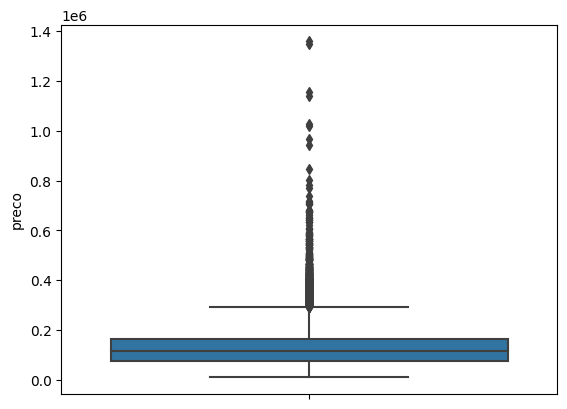

In [ ]:
# Cria o boxplot da coluna "preco"
sns.boxplot(data=df, y="preco")

# Exibe o boxplot
plt.show()

O boxplot sugere uma distribuição assimétrica, com muitos valores acima da faixa limite (outliers). Vamos visualizar o histograma:

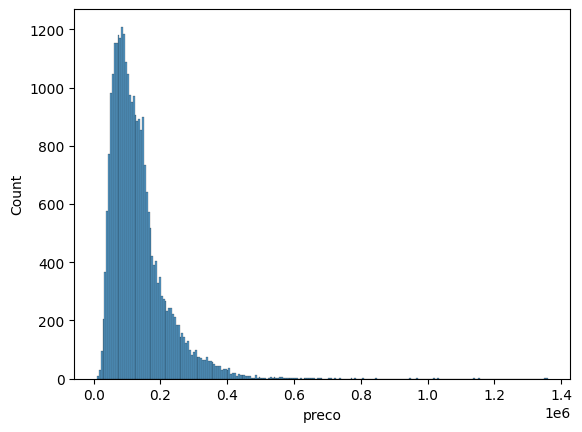

In [ ]:
# Cria o histograma da coluna "preco"
sns.histplot(data=df, x="preco")

# Exibe o histograma
plt.show()

O histograma acima confirma a alta assimetria, com uma cauda longa à direita (right-skewed). Vamos verificar os maiores preços:

In [ ]:
# Ordena o DataFrame pelo valor da coluna "preco" em ordem decrescente
data_ordenada = df.sort_values(by='preco', ascending=False)

# Seleciona as 10 primeiras linhas com os maiores preços
top_10_precos = data_ordenada.head(10)

# Exibe as linhas com os maiores preços
top_10_precos[['marca', 'modelo', 'preco']]

,marca,modelo,preco
9175,PORSCHE,911,1.359813e+06
15111,LAND ROVER,RANGE ROVER VELAR,1.349748e+06
2271,RAM,2500,1.154360e+06
4844,PORSCHE,911,1.140113e+06
21827,PORSCHE,718,1.028431e+06
15047,BMW,M2,1.019841e+06
6846,BMW,Z4,9.668446e+05
5522,PORSCHE,718,9.447675e+05
17002,PORSCHE,CAYENNE,8.451917e+05
6411,PORSCHE,718,8.045996e+05


Como os carros mais caros representam um segmento de carros de luxo (Porsche, BMW, etc.), não irei removê-los.

Ao invés disso, farei uma modelagem utilizando o algoritmo Random Forest Regressor, que é capaz de lidar com valores extremos e distribuições assimétricas, e também criarei uma nova coluna classificando as marcas.

Agora, para continuar a análise, irei verificar a quantidade de valores nulos e únicos por coluna:

In [ ]:
# Contagem de valores nulos por coluna
contagem_nulos_por_coluna = df.isnull().sum()

# Valores únicos por coluna
valores_diferentes_por_coluna = df.nunique()

# Criar um novo dataframe combinando as informações
informacoes_por_coluna = pd.DataFrame({'Valores Nulos': contagem_nulos_por_coluna, 'Valores Únicos': valores_diferentes_por_coluna})

# Exibir o dataframe com as contagens de valores nulos e valores únicos
print(informacoes_por_coluna)

                         Valores Nulos  Valores Únicos
id                                   0           29584
num_fotos                          177              14
marca                                0              40
modelo                               0             457
versao                               0            1916
ano_de_fabricacao                    0              35
ano_modelo                           0              17
hodometro                            0           26004
cambio                               0               7
num_portas                           0               3
tipo                                 0               7
blindado                             0               2
cor                                  0               7
tipo_vendedor                        0               2
cidade_vendedor                      0             575
estado_vendedor                      0              25
anunciante                           0               4
entrega_de

Vamos verificar quais são os valores das colunas **blindado**, **tipo_vendedor** e de **entrega_delivery** até **veiculo_alienado**, para conhecê-las melhor:

In [ ]:
colunas = ["blindado","tipo_vendedor","entrega_delivery","troca","elegivel_revisao", "dono_aceita_troca", "veiculo_único_dono", "revisoes_concessionaria", "ipva_pago", "veiculo_licenciado", "garantia_de_fábrica", "revisoes_dentro_agenda", "veiculo_alienado"]

for coluna in colunas:
    valores_unicos = df[coluna].unique()
    print(f"Valores únicos em {coluna}: {valores_unicos}")

Valores únicos em blindado: ['N' 'S']
Valores únicos em tipo_vendedor: ['PF' 'PJ']
Valores únicos em entrega_delivery: [False  True]
Valores únicos em troca: [False  True]
Valores únicos em elegivel_revisao: [False]
Valores únicos em dono_aceita_troca: [nan 'Aceita troca']
Valores únicos em veiculo_único_dono: [nan 'Único dono']
Valores únicos em revisoes_concessionaria: ['Todas as revisões feitas pela concessionária' nan]
Valores únicos em ipva_pago: ['IPVA pago' nan]
Valores únicos em veiculo_licenciado: ['Licenciado' nan]
Valores únicos em garantia_de_fábrica: [nan 'Garantia de fábrica']
Valores únicos em revisoes_dentro_agenda: [nan 'Todas as revisões feitas pela agenda do carro']
Valores únicos em veiculo_alienado: [nan]


Vou começar a limpeza excluindo a coluna **elegivel_revisao** e **veiculo_alienado**, já que não possuem valores.

Após isso, trocarei *False* e *True* por 0 e 1 nas colunas **entrega_delivery** e **troca**, e *N* e *S* por 0 e 1, na coluna **blindado**.

Nas colunas que possuem apenas um valor (como **dono_aceita_troca**), vou trocar nulo por 0 e o valor 'Aceita troca' por 1, por exemplo.

In [ ]:
colunas_para_remover = ["veiculo_alienado", "elegivel_revisao"]
df = df.drop(colunas_para_remover, axis=1)

In [ ]:
colunas_para_substituir = ["entrega_delivery", "troca"]
df[colunas_para_substituir] = df[colunas_para_substituir].replace({False: 0, True: 1})

In [ ]:
df["blindado"] = df["blindado"].replace({'N': 0, 'S': 1})

In [ ]:
colunas_substituir_nulo = ['dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda']
df[colunas_substituir_nulo] = df[colunas_substituir_nulo].notnull().astype(int)


Recontando os nulos:

In [ ]:
contagem_nulos_por_coluna = df.isnull().sum()
contagem_nulos_por_coluna

id                           0
num_fotos                  177
marca                        0
modelo                       0
versao                       0
ano_de_fabricacao            0
ano_modelo                   0
hodometro                    0
cambio                       0
num_portas                   0
tipo                         0
blindado                     0
cor                          0
tipo_vendedor                0
cidade_vendedor              0
estado_vendedor              0
anunciante                   0
entrega_delivery             0
troca                        0
dono_aceita_troca            0
veiculo_único_dono           0
revisoes_concessionaria      0
ipva_pago                    0
veiculo_licenciado           0
garantia_de_fábrica          0
revisoes_dentro_agenda       0
preco                        0
dtype: int64

Ótimo. A coluna **num_fotos** possui valores nulos, mas trataremos mais tarde.

Agora irei olhar novamente o df, sem truncar as colunas:

In [ ]:
pd.set_option('display.max_columns', None)
with pd.option_context('display.max_rows', None):
    print(df.head())

                                        id  num_fotos       marca   modelo  \
0  300716223898539419613863097469899222392        8.0      NISSAN    KICKS   
1  279639842134129588306469566150288644214        8.0        JEEP  COMPASS   
2   56414460810621048900295678236538171981       16.0         KIA  SORENTO   
3   56862509826849933428086372390159405545       14.0  VOLKSWAGEN   AMAROK   
4  338980975753200343894519909855598027197        8.0   SSANGYONG  KORANDO   

                                              versao  ano_de_fabricacao  \
0                    1.6 16V FLEXSTART SL 4P XTRONIC               2017   
1                    2.0 16V FLEX LIMITED AUTOMÁTICO               2017   
2              2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO               2018   
3  2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...               2013   
4         2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO               2013   

   ano_modelo  hodometro      cambio  num_portas                  tipo  \
0     

Observei que, na coluna **versao**, podemos criar uma nova coluna **cilindrada**, que pode ser útil para previsão do preço.

In [ ]:
# Aplicando expressão regular para extrair a cilindrada da coluna 'versao' e criar uma nova coluna 'cilindrada'
df['cilindrada'] = df['versao'].apply(lambda x: re.findall(r'\d+\.\d+|\d+', str(x))[0] if re.findall(r'\d+\.\d+|\d+', str(x)) else np.nan)

# Exibindo a coluna
df['cilindrada']

0        1.6
1        2.0
2        2.4
3        2.0
4        2.0
        ... 
29579    2.8
29580    1.0
29581    2.8
29582    1.6
29583    3.0
Name: cilindrada, Length: 29584, dtype: object

Verificando se há algum valor inconsistente na cilindrada:

In [ ]:
valores_unicos = df['cilindrada'].unique()
print(valores_unicos)

['1.6' '2.0' '2.4' '1.0' '1.5' '2.7' '1.8' '1.2' '1.4' '3.0' '3.2' '3.5'
 '1.3' '4.4' '2.2' '2.8' '2.3' '2.5' '2.1' '4.2' '3.8' '3.6' '60' '6.7'
 '12' '3.3' '5.0' '6.2' '2.9' '4.0' '1.9' '3.7' '1.7' '4.8' '4.9' '8' '40'
 '0.6' '4' nan '5.5' '4.1' '3.9' '90' '4.3' '4.6' '5.2' '5.7' '4.5' '4.7'
 '5.9']


Não estão corretos alguns desses valores, como 60, 12... Vamos substituir esses valores por nulos

In [ ]:
valores_incorretos = ['60', '12', '8', '40', '4', '90']
df['cilindrada'] = df['cilindrada'].replace(valores_incorretos, np.nan)
print(df['cilindrada'].unique())

['1.6' '2.0' '2.4' '1.0' '1.5' '2.7' '1.8' '1.2' '1.4' '3.0' '3.2' '3.5'
 '1.3' '4.4' '2.2' '2.8' '2.3' '2.5' '2.1' '4.2' '3.8' '3.6' nan '6.7'
 '3.3' '5.0' '6.2' '2.9' '4.0' '1.9' '3.7' '1.7' '4.8' '4.9' '0.6' '5.5'
 '4.1' '3.9' '4.3' '4.6' '5.2' '5.7' '4.5' '4.7' '5.9']


Fazer uma contagem de nulos:

In [ ]:
contagem_nulos = df['cilindrada'].isnull().sum()
print("Número de valores nulos na coluna 'cilindrada':", contagem_nulos)

Número de valores nulos na coluna 'cilindrada': 70


Vamos entender melhor quem são esses carros que acabaram ficando sem a cilindrada:

In [ ]:
# Selecionando as linhas com valores nulos na coluna 'cilindrada'
df_null_cilindrada = df[df['cilindrada'].isnull()][['marca','modelo','versao']]

# Exibindo as linhas com valores nulos na coluna 'cilindrada'
df_null_cilindrada

,marca,modelo,versao
3170,AUDI,E-TRON,ELÉTRICO SPORTBACK PERFORMANCE BLACK QUATTRO
3631,AUDI,E-TRON,ELÉTRICO SPORTBACK PERFORMANCE QUATTRO
15924,PORSCHE,TAYCAN,TURBO ELÉTRICO
16100,PORSCHE,TAYCAN,ELÉTRICO
19558,PORSCHE,TAYCAN,ELÉTRICO
19598,BMW,i3,ELÉTRICO eDRIVE BEV FULL AUTOMÁTICO
19866,PORSCHE,TAYCAN,ELÉTRICO
23999,AUDI,E-TRON,ELÉTRICO PERFORMANCE QUATTRO
24982,PORSCHE,TAYCAN,TURBO ELÉTRICO
27554,BMW,i3,ELÉTRICO eDRIVE BEV AUTOMÁTICO


São carros elétricos! Carros com motor elétrico não tem cilindrada, já que essa é uma medida de motores a combustão (volume total dos cilindros aonde ocorre a combustão do combustível).

Vou verificar se todos os eletricos estão com a cilindrada nula:



In [ ]:
# Função para verificar se a versão contém a palavra 'elétrico' ou 'eletrico'
def has_electric_version(version):
    pattern = r'el[eé]trico'
    return re.search(pattern, str(version), flags=re.IGNORECASE) is not None

# Filtrando as linhas com cilindrada nula e versão contendo a palavra 'elétrico' ou 'eletrico'
df_filtered = df[df['cilindrada'].isnull() & df['versao'].apply(has_electric_version)]

# Exibindo a quantidade de linhas
df_filtered.shape[0]

10

Como a cilindrada é um fator importante na predição de preço de um carro, irei substituir os valores nulos pela média, mais à frente. Isso porque a algoritmo Random Forest Regressor não permite valores nulos.

Agora, vou transformar o data type da coluna **cilindrada** para um valor numérico, e multiplicar por 1000, para ter a unidade "cilindradas"

In [ ]:
df['cilindrada'] = df['cilindrada'].astype(float) * 1000

Muito bem. Agora que já estamos com os dados mais limpos, vamos para as análises de hipóteses de negócio

### **Hipóteses de negócio**

#### **Hipótese 1**: A marca do carro influencia o preço de venda

**Procedimento**:


1.   Calcular a média por marca, e visualizar num gráfico de barras
2.   Comparar a média entre as marcas para verificar se há diferenças significativas

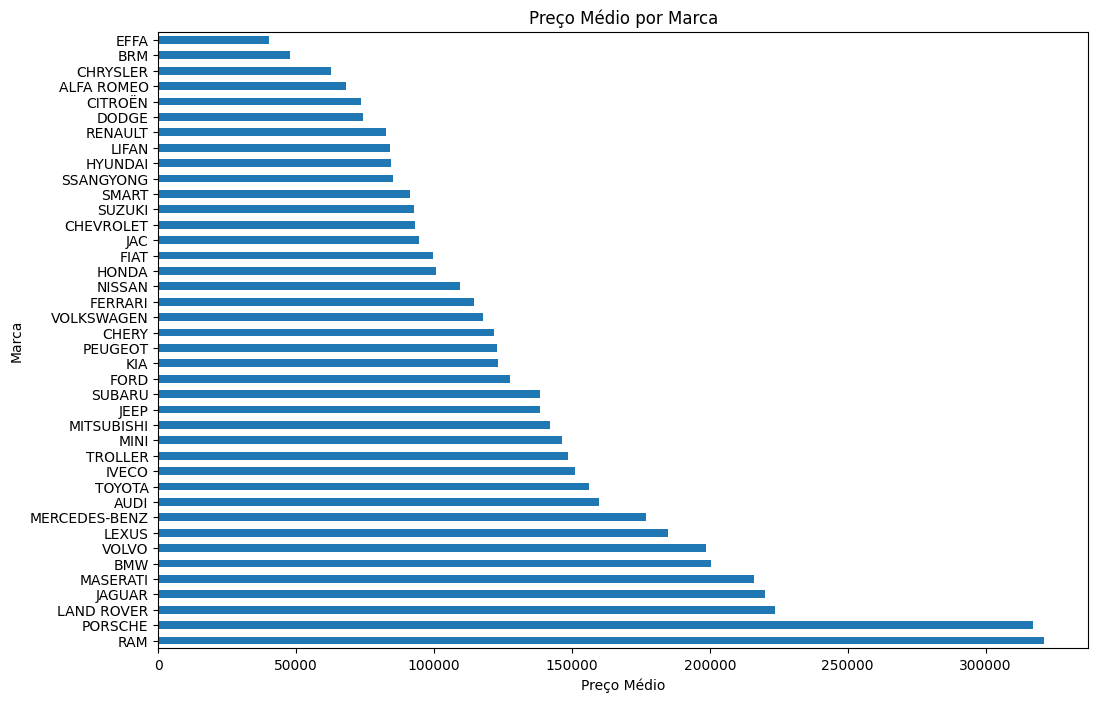

In [ ]:
media_por_marca = df.groupby('marca')['preco'].mean()
media_por_marca = media_por_marca.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
media_por_marca.plot(kind='barh')

plt.xlabel('Preço Médio')
plt.ylabel('Marca')
plt.title('Preço Médio por Marca')

plt.show()


Podemos verificar uma grande variação das médias por marcas. Enquanto a marca "Effa" tem uma média de preços inferior a 50 mil reais, a marca "Ram" tem média superior a 300 mil reais, o que indica que nossa hipótese é correta.

#### **Hipótese 2**: Carros com menor quilometragem têm um preço de venda mais alto

**Procedimento**:

1.   Visualizar a relação entre o preço e a quilometragem usando um gráfico de dispersão
2.   Calcular a correlação entre o preço e a quilometragem para avaliar a força e a direção da relação




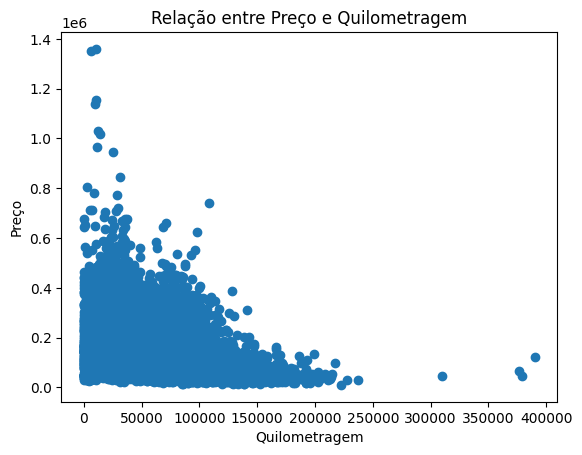

Correlação entre Preço e Quilometragem: -0.359218058952162


In [ ]:
plt.scatter(df['hodometro'], df['preco'])

plt.xlabel('Quilometragem')
plt.ylabel('Preço')
plt.title('Relação entre Preço e Quilometragem')

plt.show()

correl = df['preco'].corr(df['hodometro'])
print(f"Correlação entre Preço e Quilometragem: {correl}")

A análise revelou uma correlação negativa fraca (-0.359) entre o preço e a quilometragem dos veículos. Isso significa que, em geral, há uma tendência de os veículos com maior quilometragem possuírem preços mais baixos.

Essa relação pode ser observada no gráfico de dispersão, com uma leve tendência de inclinação para baixo ao longo do eixo x. Com base nesses resultados, podemos confirmar a hipótese de que a quilometragem afeta o preço dos veículos de forma inversa.

#### **Hipótese 3**: Carros com mais opções de fotos têm maior probabilidade de serem vendidos por preços mais caros

**Procedimento**:

1.   Calcular a média de fotos para todos os carros anunciados
2.   Comparar as estatísticas de preço entre os carros com mais fotos (acima da média) e os carros com menos fotos (abaixo da média)



In [ ]:
# Calculando a média de fotos para todos os carros anunciados
media_fotos = df['num_fotos'].mean()
print(f"Média de fotos para todos os carros anunciados: {media_fotos}")

# Filtrando os carros com mais fotos e menos fotos em relação à média
carros_mais_fotos = df[df['num_fotos'] > media_fotos]
carros_menos_fotos = df[df['num_fotos'] < media_fotos]

# Obtendo estatísticas de preço para os carros com mais fotos
estatisticas_mais_fotos = carros_mais_fotos['preco'].describe()

# Obtendo estatísticas de preço para os carros com menos fotos
estatisticas_menos_fotos = carros_menos_fotos['preco'].describe()

# Exibindo as estatísticas de preço para carros com mais fotos
print("Estatísticas de preço para carros com mais fotos:")
print(estatisticas_mais_fotos)

# Exibindo as estatísticas de preço para carros com menos fotos
print("\nEstatísticas de preço para carros com menos fotos:")
print(estatisticas_menos_fotos)


Média de fotos para todos os carros anunciados: 10.323834461182711
Estatísticas de preço para carros com mais fotos:
count    9.256000e+03
mean     1.278783e+05
std      8.348055e+04
min      1.364289e+04
25%      7.236333e+04
50%      1.071570e+05
75%      1.558227e+05
max      1.359813e+06
Name: preco, dtype: float64

Estatísticas de preço para carros com menos fotos:
count    2.015100e+04
mean     1.355234e+05
std      8.098534e+04
min      9.869951e+03
25%      7.884908e+04
50%      1.177203e+05
75%      1.674349e+05
max      1.154360e+06
Name: preco, dtype: float64


Com base nas estatísticas, podemos concluir que não há diferenças significativas nos preços entre os carros com mais fotos e os carros com menos fotos. Ambos os grupos apresentam médias de preço semelhantes, com valores próximos.

Portanto, a quantidade de fotos nos anúncios não parece ser um fator determinante na precificação dos veículos, e nossa hipótese foi refutada, nesse caso.

### Perguntas de negócios

#### 1- Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

Para responder essa pergunta, assumirei que carro popular possui **cilindradas** até 1400 e **preco** até 50 mil reais.

A partir daí, calcularei a média de preços bem como a quantidade de vendas, por estado, com esse filtro.

O estado com maior equilíbrio entre quantidade de vendas e preço médio será considerado o melhor para se vender um carro popular.

In [ ]:
# Filtrar por cilindrada até 1400 e preço até 50000
filtro = (df['cilindrada'] <= 1400) & (df['preco'] <= 50000)
df_filtrado = df[filtro]

# Calcular a média de preços por estado
media_precos_por_estado = df_filtrado.groupby('estado_vendedor')['preco'].mean()

# Criar um novo DataFrame com as informações de quantidade de vendas e média de preços por estado
vendas_e_precos_por_estado = pd.concat([df_filtrado['estado_vendedor'].value_counts(), media_precos_por_estado], axis=1)
vendas_e_precos_por_estado.columns = ['Quantidade de Vendas', 'Média de Preços']

# Exibir o DataFrame com as informações de quantidade de vendas e média de preços por estado
print(vendas_e_precos_por_estado)



                          Quantidade de Vendas  Média de Preços
São Paulo (SP)                             569     40212.254332
Rio de Janeiro (RJ)                         62     38109.748056
Santa Catarina (SC)                         60     39272.648949
Paraná (PR)                                 50     40279.217631
Minas Gerais (MG)                           41     40206.980603
Bahia (BA)                                  39     41066.488680
Rio Grande do Sul (RS)                      24     36467.835930
Pernambuco (PE)                             11     40865.461875
Goiás (GO)                                   6     42793.786516
Amazonas (AM)                                6     38920.508433
Paraíba (PB)                                 5     40568.800926
Acre (AC)                                    5     42582.524018
Ceará (CE)                                   5     43395.772786
Rio Grande do Norte (RN)                     4     37363.464361
Alagoas (AL)                            

considerando os dados fornecidos, São Paulo (SP) pode ser considerado o melhor estado para se vender um carro de marca popular, devido à sua alta demanda e preços médios atraentes.

#### 2- Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

A ideia aqui se assemelha à da questão anterior, mas procurando o estado com menor preço médio.

Em primeiro lugar, vamos entender quais são as nomenclaturas que definem o câmbio automático e o tipo Picape

In [ ]:
valores_unicos_cambio = df['cambio'].unique()
print(valores_unicos_cambio)

valores_unicos_tipo = df['tipo'].unique()
print(valores_unicos_tipo)

['CVT' 'Automática' 'Manual' 'Automatizada' 'Semi-automática'
 'Automatizada DCT' 'Automática Sequencial']
['Sedã' 'Picape' 'Utilitário esportivo' 'Hatchback' 'Perua/SW' 'Cupê'
 'Minivan']


Portanto faremos o filtro quando o tipo for 'Picape' e quando o câmbio for 'Automática' , 'Automatizada' , 'Automatizada DCT' ou 'Automática Sequencial':

In [ ]:
# Filtrar os carros do tipo 'Picape'
filtro_tipo = df['tipo'] == 'Picape'

# Filtrar os carros com transmissão automática
filtro_cambio = df['cambio'].isin(['Automática', 'Automatizada', 'Automatizada DCT', 'Automática Sequencial'])

# Aplicar os filtros para obter as picapes com transmissão automática
picapes_automaticas = df[filtro_tipo & filtro_cambio]

# Agrupar por estado e calcular a média de preços e a quantidade de vendas
agrupado_por_estado = picapes_automaticas.groupby('estado_vendedor').agg({'preco': 'mean', 'estado_vendedor': 'count'})

# Renomear as colunas para 'Média de Preços' e 'Quantidade de Vendas'
agrupado_por_estado.columns = ['Média de Preços', 'Quantidade de Vendas']

# Ordenar por quantidade de vendas em ordem decrescente
agrupado_por_estado = agrupado_por_estado.sort_values('Quantidade de Vendas', ascending=False)

# Exibir a análise das picapes com transmissão automática por estado
print("Análise das picapes com transmissão automática:")
print(agrupado_por_estado)

Análise das picapes com transmissão automática:
                          Média de Preços  Quantidade de Vendas
estado_vendedor                                                
São Paulo (SP)              189474.954522                  1727
Paraná (PR)                 198637.039970                   350
Rio de Janeiro (RJ)         181545.360562                   321
Santa Catarina (SC)         187017.576273                   285
Minas Gerais (MG)           195702.914796                   211
Rio Grande do Sul (RS)      196110.323713                   199
Goiás (GO)                  208153.658437                   102
Bahia (BA)                  206364.799217                    68
Pernambuco (PE)             192566.764505                    14
Alagoas (AL)                218671.542780                    12
Acre (AC)                   145256.693656                     6
Mato Grosso (MT)            214102.315642                     6
Mato Grosso do Sul (MS)     144700.247621               

Analisando os resultados, temos que o mercado com mais opções é no estado de São Paulo, seguido por Paraná, Rio de Janeiro, Santa Catarina, Minas Gerais e Rio Grande do Sul.

Dentre eles, o menor preço médio é no Rio de Janeiro, 181 mil reais, aproximadamente.

Desse modo, acredito que o melhor estado seja o Rio de Janeiro, pela alta oferta e preço médio mais baixo.

#### 3- Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

O procedimento será: separar carros com garantia, calcular a média, o mínimo e o máximo do preço, e fazer uma contagem, por estado.

In [ ]:
# Filtrar os carros que possuem garantia de fábrica
carros_com_garantia = df[df['garantia_de_fábrica'] == True]

# Definir as agregações desejadas (média, mínimo, máximo e quantidade)
agregacao = {'preco': ['mean', 'min', 'max'], 'estado_vendedor': 'count'}

# Aplicar as agregações no DataFrame dos carros com garantia, agrupando por estado do vendedor
resultados = carros_com_garantia.groupby('estado_vendedor').agg(agregacao)

# Renomear as colunas do DataFrame com as estatísticas de preço e quantidade
resultados.columns = ['Média de Preço', 'Mínimo de Preço', 'Máximo de Preço', 'Quantidade']

# Ordenar o DataFrame resultante pela quantidade de carros com garantia em ordem decrescente
resultados = resultados.sort_values('Quantidade', ascending=False)

# Exibir os resultados das estatísticas de preço e quantidade de carros com garantia por estado
resultados

,Média de Preço,Mínimo de Preço,Máximo de Preço,Quantidade
estado_vendedor,,,,
São Paulo (SP),166751.081004,31763.159542,677129.123324,2307
Rio de Janeiro (RJ),179109.858403,39556.398656,486869.600468,412
Paraná (PR),175578.245503,29328.116594,429236.244325,389
Santa Catarina (SC),173798.439853,44004.769748,672933.092917,330
Rio Grande do Sul (RS),176442.236455,54742.833352,589418.739087,281
Minas Gerais (MG),161206.273890,29906.894268,426790.142244,264
Goiás (GO),174521.413156,45812.306967,486648.154645,186
Alagoas (AL),154268.676544,55178.097786,353250.074635,58
Bahia (BA),165221.236199,33100.914663,351109.005575,51


Acredito que os estados com maior variedade de modelos e de preços seja a melhor escolha, desse modo, temos São Paulo em primeiro lugar, seguido do Rio de Janeiro e Paraná.

## Análises estatísticas das variáveis

### Análise descritiva  

Vamos conhecer um pouco mais nossos dados:

In [ ]:
descricao = df.describe(include='all')
descricao

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco,cilindrada
count,29584,29407.000000,29584,29584,29584,29584.000000,29584.000000,29584.000000,29584,29584.000000,29584,29584.000000,29584,29584,29584,29584,29584,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,2.958400e+04,29514.000000
unique,29584,NaN,40,457,1916,NaN,NaN,NaN,7,NaN,7,NaN,7,2,575,25,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,300716223898539419613863097469899222392,NaN,VOLKSWAGEN,COMPASS,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,NaN,NaN,NaN,Automática,NaN,Sedã,NaN,Branco,PF,São Paulo,São Paulo (SP),Pessoa Física,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,4594,1480,1352,NaN,NaN,NaN,22545,NaN,16429,NaN,20949,17926,6158,16378,17999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.323834,NaN,NaN,NaN,2016.758552,2017.808985,58430.592077,NaN,3.940677,NaN,0.008383,NaN,NaN,NaN,NaN,NaN,0.202238,0.171072,0.741009,0.352319,0.310032,0.664515,0.537655,0.147546,0.199770,1.330239e+05,1926.295995
std,NaN,3.487334,NaN,NaN,NaN,4.062422,2.673930,32561.769309,NaN,0.338360,NaN,0.091175,NaN,NaN,NaN,NaN,NaN,0.401675,0.376578,0.438088,0.477701,0.462514,0.472168,0.498588,0.354655,0.399834,8.166287e+04,741.949912
min,NaN,8.000000,NaN,NaN,NaN,1985.000000,1997.000000,100.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.869951e+03,600.000000
25%,NaN,8.000000,NaN,NaN,NaN,2015.000000,2016.000000,31214.000000,NaN,4.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.657177e+04,1500.000000
50%,NaN,8.000000,NaN,NaN,NaN,2018.000000,2018.000000,57434.000000,NaN,4.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.143558e+05,2000.000000
75%,NaN,14.000000,NaN,NaN,NaN,2019.000000,2020.000000,81953.500000,NaN,4.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.636796e+05,2000.000000


In [ ]:
# Iterar sobre as colunas e encontrar o valor mais frequente e sua contagem
for coluna in df.columns:
    contagem_total = df[coluna].value_counts().sum()
    valor_mais_frequente = df[coluna].value_counts().idxmax()
    contagem = df[coluna].value_counts().max()
    porcentagem = (contagem / contagem_total) * 100
    print(f"Coluna: {coluna}")
    print(f"Valor mais frequente: {valor_mais_frequente}")
    print(f"Contagem: {contagem}")
    print(f"Porcentagem: {porcentagem:.2f}%")
    print()

Coluna: id
Valor mais frequente: 300716223898539419613863097469899222392
Contagem: 1
Porcentagem: 0.00%

Coluna: num_fotos
Valor mais frequente: 8.0
Contagem: 19420
Porcentagem: 66.04%

Coluna: marca
Valor mais frequente: VOLKSWAGEN
Contagem: 4594
Porcentagem: 15.53%

Coluna: modelo
Valor mais frequente: COMPASS
Contagem: 1480
Porcentagem: 5.00%

Coluna: versao
Valor mais frequente: 1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO
Contagem: 1352
Porcentagem: 4.57%

Coluna: ano_de_fabricacao
Valor mais frequente: 2020
Contagem: 4729
Porcentagem: 15.98%

Coluna: ano_modelo
Valor mais frequente: 2021.0
Contagem: 5071
Porcentagem: 17.14%

Coluna: hodometro
Valor mais frequente: 100.0
Contagem: 76
Porcentagem: 0.26%

Coluna: cambio
Valor mais frequente: Automática
Contagem: 22545
Porcentagem: 76.21%

Coluna: num_portas
Valor mais frequente: 4
Contagem: 28697
Porcentagem: 97.00%

Coluna: tipo
Valor mais frequente: Sedã
Contagem: 16429
Porcentagem: 55.53%

Coluna: blindado
Valor mais frequente: 0
Conta

Com isso, podemos perceber algumas coisas importantes nesse dataset:

**num_fotos**:

*   Média: 10,318778
*   Desvio padrão: 3,484220
*   Valor mínimo: 8
*   Valor máximo: 21


**marca**:

*   Total de marcas: 40
*   Marca mais frequente: VOLKSWAGEN (4594 registros)

**modelo**:

*   Total de modelos: 457
*   Modelo mais comum: COMPASS (1480 registros)

**versao**:

*   Versão mais frequente: 1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO (1352 registros)

**ano_de_fabricacao**:

*   Média: 2016,75
*   Desvio padrão: 4,06
*   Valor mínimo: 1985
*   Valor máximo: 2022

**ano_modelo**:

*   Média: 2017,81
*   Desvio padrão: 2,67
*   Valor mínimo: 1997
*   Valor máximo: 2023

**hodometro**:

*   Média: 58430,59
*   Desvio padrão: 32561,77
*   Valor mínimo: 100
*   Valor máximo: 390065

**cambio**:

*   Total de tipos de câmbio: 7
*   Câmbio mais comum: Automática (22545 registros)

**num_portas**:

*   Média: 3,94
*   Desvio padrão: 0,34
*   Valor mínimo: 2
*   Valor máximo: 4

**tipo**:

*   Total de tipos de veículo: 7
*   Tipo mais comum: Sedã (16429 registros)

**blindado**:

*   Proporção de veículos blindados: 0,8% (248 registros)

**cor**:

*   Total de cores: 7
*   Cor mais comum: Branco (20949 registros)

**tipo_vendedor**:

*   Total de tipos de vendedor: 2
*   Tipo de vendedor mais comum: Pessoa Física (17926 registros)


**cidade_vendedor**:

*   Total de cidades de vendedor: 575
*   Cidade mais comum: São Paulo (6158 registros)

**anunciante**:

*   Total de tipos de anunciante: 4
*   Anunciante mais comum: Pessoa Física (17999 registros)

**entrega_delivery**:

*   Proporção de anúncios com entrega via delivery: 20,2% (5983 registros)

**troca**:

*   Proporção de carros que já tiveram trocas: 17,1% (5061 registros)

**dono_aceita_troca**:

*   Proporção de veículos cujos donos aceitam trocas: 74,1% (21922 registros)

**veiculo_único_dono**:

*   Proporção de veículos que possuem apenas um dono: 35,2% (10423 registros)

**revisoes_concessionaria**:

*   Proporção de veículos com revisões em concessionária: 31% (9172 registros)

**ipva_pago**:

*   Proporção de veículos com IPVA pago: 66,5% (19659 registros)

**veiculo_licenciado**:

*   Proporção de veículos licenciados: 53,8% (15906 registros)


**garantia_de_fábrica**:

*   Proporção de veículos com garantia de fábrica: 14,8% (4365 registros)


**revisoes_dentro_agenda**:

*   Proporção de veículos com revisões dentro da agenda: 20% (5910 registros)

**preco**:

*   Média: 132754,00
*   Desvio padrão: 81497,00
*   Valor mínimo: 9869,95
*   Valor máximo: 1359813,00

**cilindrada**:


*   Valor mais frequente: 2000 (10340 registros)








Aqui está uma síntese das principais conclusões da análise descritiva dos *features*:


> A maioria dos veículos possui uma cilindrada de 2.0, indicando uma preferência por essa capacidade de motor.




> Os anúncios geralmente contêm cerca de 10 fotos, permitindo que os compradores tenham uma boa visualização dos veículos.

> A marca mais frequente nos anúncios é a VOLKSWAGEN, presente em um grande número de registros.

> O modelo mais comum é o COMPASS, mostrando sua popularidade entre os veículos anunciados.

> Os veículos têm uma média de fabricação em torno de 2016, com um ano modelo médio próximo a 2018.

> O hodômetro médio registra aproximadamente 58516 quilômetros percorridos pelos veículos anunciados.

> A transmissão automática é a mais comum, indicando uma preferência por esse tipo de câmbio.

> A maioria dos veículos possui 4 portas, mas há variação entre 2 e 4 portas.

> Os Sedãs são os tipos de veículos mais comuns nos anúncios.

Essas informações fornecem uma visão geral das características dos veículos anunciados, permitindo que compradores e vendedores tenham uma compreensão mais clara do mercado.

Além disso, é relevante destacar o preço médio dos veículos, que é de aproximadamente R$ 132754, fornecendo uma referência para o valor desses automóveis.

### Análise de correlação

Na análise estatística, é comum utilizar diferentes métodos para avaliar a correlação entre variáveis em um conjunto de dados. Nesse dataset, utilizarei a **Correlação de Pearson**, **ANOVA** e o teste **T de Student**.

Para variáveis contínuas, a **correlação de Pearson** é frequentemente usada para medir a força e a direção da relação linear entre duas variáveis. O coeficiente de correlação de Pearson varia de -1 a 1, onde valores próximos de 1 indicam uma forte correlação positiva, valores próximos de -1 indicam uma forte correlação negativa, e valores próximos de 0 indicam uma correlação fraca ou ausente.

No caso de variáveis categóricas, um método comum é a análise de variância (**ANOVA**), que permite comparar as médias entre grupos distintos. A ANOVA é usada para determinar se existe uma diferença significativa entre as médias das variáveis dependentes em diferentes grupos. Ela calcula uma estatística F e realiza um teste de hipótese para verificar se as médias são iguais ou diferentes.

Quando se trata de variáveis binárias, como variáveis com apenas duas categorias, um teste de **t de Student** é frequentemente aplicado. O teste de t de Student compara as médias entre dois grupos independentes para determinar se existe uma diferença significativa. Ele calcula um valor t e realiza um teste de hipótese para verificar se as médias são estatisticamente diferentes.

#### Correlação de Pearson (variáveis numéricas)

Verificando a correlação das variáveis numéricas com nosso *target*, a coluna **preco**

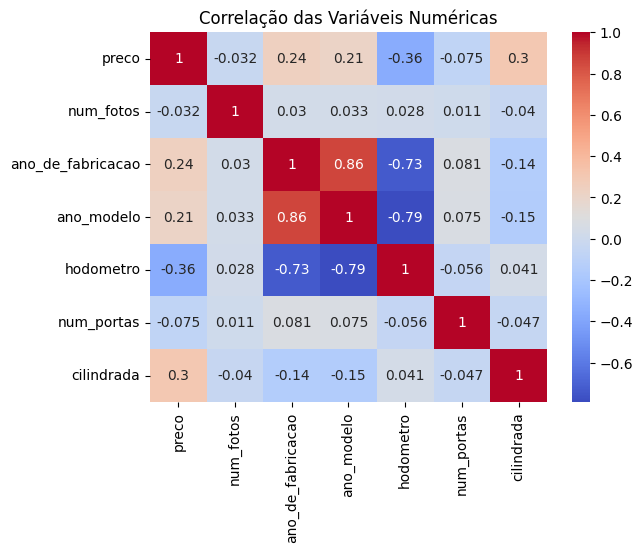

In [ ]:
colunas = ['preco', 'num_fotos', 'ano_de_fabricacao', 'ano_modelo', 'hodometro', 'num_portas', 'cilindrada']
colunas_selecionadas = df[colunas]

matriz_corr = colunas_selecionadas.corr()

sns.heatmap(matriz_corr, annot=True, cmap='coolwarm')
plt.title('Correlação das Variáveis Numéricas')

plt.show()

Existem quatro variáveis contínuas que apresentam correlação significativa com o preço dos veículos:

**ano_de_fabricacao**, **ano_modelo**, **hodometro** e **cilindrada**.

A idade do veículo, representada pelo ano de fabricação e ano do modelo, tem uma correlação positiva moderada com o preço. Carros mais recentes tendem a ter preços mais altos.

Por outro lado, o hodômetro, que indica a quilometragem percorrida, mostra uma correlação negativa moderada com o preço. Veículos com menor quilometragem tendem a ter preços mais altos.

A cilindrada tem uma relação diretamente proporcional com a potência, e, portanto, carros com mais cilindradas tendem a ter preços mais elevados.

Essas variáveis são relevantes para a previsão de preços e devem ser consideradas na análise dos dados.

Também vemos que as variáveis **num_fotos** (corroborando novamente nossa análise da hipotese de negócio 3) e **num_portas** tem correlação negativa muito baixa com o preço de revenda, e serão excluídas da modelagem.

In [ ]:
df = df.drop(['num_portas', 'num_fotos'], axis=1)

#### Análise de variância (ANOVA) (variáveis categóricas)

In [ ]:
# Criar um dataframe com as variáveis de interesse
df_anova = df[['marca', 'modelo', 'cambio', 'tipo', 'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'anunciante', 'preco']]

# Função para executar o teste ANOVA e retornar os resultados
def perform_anova(data, target, categorical_vars):
    anova_results = {}
    for var in categorical_vars:
        groups = data.groupby(var)[target].apply(list)
        f_value, p_value = stats.f_oneway(*groups.values)
        anova_results[var] = {'F-value': f_value, 'p-value': p_value}
    return anova_results

# Realizar o teste ANOVA para as variáveis categóricas em relação ao preço
anova_results = perform_anova(df_anova, 'preco', ['marca', 'modelo', 'cambio', 'tipo', 'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'anunciante'])

# Imprimir os resultados
for var, result in anova_results.items():
    print(f"Variável: {var}")
    print(f" - F-value: {result['F-value']}")
    print(f" - p-value: {result['p-value']}\n")

Variável: marca
 - F-value: 308.00197479018334
 - p-value: 0.0

Variável: modelo
 - F-value: 78.15523847509701
 - p-value: 0.0

Variável: cambio
 - F-value: 511.1523023258059
 - p-value: 0.0

Variável: tipo
 - F-value: 1484.0173573663303
 - p-value: 0.0

Variável: cor
 - F-value: 246.72350142010066
 - p-value: 5.37256935176686e-309

Variável: tipo_vendedor
 - F-value: 238.81661957185912
 - p-value: 1.1552814710117806e-53

Variável: cidade_vendedor
 - F-value: 5.930980753179019
 - p-value: 0.0

Variável: estado_vendedor
 - F-value: 11.299586514976015
 - p-value: 1.6927458231812857e-43

Variável: anunciante
 - F-value: 86.84793963800196
 - p-value: 6.039276152082744e-56



Com base nos resultados do teste ANOVA, podemos observar que todas as variáveis categóricas apresentaram um valor-p muito baixo (próximo de zero), o que indica que existe uma associação significativa entre essas variáveis e o preço dos veículos, de modo que utilizaremos todas as colunas em nosso modelo preditivo.

#### Teste T de Student (variáveis binárias)

In [ ]:
variaveis_binarias = ['blindado', 'entrega_delivery', 'troca', 'dono_aceita_troca', 'veiculo_único_dono',
               'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica',
               'revisoes_dentro_agenda']

# Realizando o teste t de Student para cada variável
for var in variaveis_binarias:
    grupo1 = df[df[var] == 1]['preco']
    grupo2 = df[df[var] == 0]['preco']

    # Realizando o teste t de Student
    t_stat, p_value = stats.ttest_ind(grupo1, grupo2)

    # Imprimindo os resultados
    print(f"Variável: {var}")
    print(f"- T-statistic: {t_stat}")
    print(f"- p-value: {p_value}")
    print()

Variável: blindado
- T-statistic: 15.150303704020246
- p-value: 1.1790119790277891e-51

Variável: entrega_delivery
- T-statistic: -11.623486579500675
- p-value: 3.659744169184197e-31

Variável: troca
- T-statistic: -9.2052332827559
- p-value: 3.627320693670181e-20

Variável: dono_aceita_troca
- T-statistic: 14.013649522897646
- p-value: 1.78513730970854e-44

Variável: veiculo_único_dono
- T-statistic: 12.782596189815429
- p-value: 2.575143072628773e-37

Variável: revisoes_concessionaria
- T-statistic: 31.35059856782346
- p-value: 2.856920631272851e-212

Variável: ipva_pago
- T-statistic: -1.7310398099032613
- p-value: 0.08345509132505556

Variável: veiculo_licenciado
- T-statistic: -2.7313982920232864
- p-value: 0.0063103585276627384

Variável: garantia_de_fábrica
- T-statistic: 32.060715809948036
- p-value: 9.769598578351149e-222

Variável: revisoes_dentro_agenda
- T-statistic: 20.200936084354794
- p-value: 3.900727066114947e-90



Ao analisar as associações entre as variáveis binárias e o preço dos veículos, destacam-se algumas das maiores e menores correlações. As variáveis **revisoes_concessionaria** e **garantia_de_fábrica** estão positivamente associadas ao preço dos veículos, enquanto **entrega_delivery** e **troca** apresentam uma associação negativa.

Quanto à *feature* **ipva_pago**, o p-value indica uma associação menos significativa, de modo que iremos excluí-la para a análise preditiva.

In [ ]:
df = df.drop(['ipva_pago'], axis=1)

## Modelagem Preditiva: Random Forest

Para fazer a previsão do preço a partir dos dados, utilizarei um modelo com o algoritmo Random Forest.

Estamos resolvendo um problema de regressão, onde queremos prever o preço do carro com base em suas características. Random Forest é adequado para esse tipo de problema, pois é capaz de lidar bem com dados extremos e capturar relações não-lineares entre as variáveis.

A variável alvo é o preço do carro, e as variáveis utilizadas serão:

**ano_de_fabricacao** ;

 **marca** (one-hot encoding) ;

 **hodometro** ;

 **cambio** (one-hot encoding) ;

 **tipo** (one-hot encoding) ;

 **blindado** ;

 **cor** (one-hot encoding) ;

 **anunciante** (one-hot encoding) ;

**entrega_delivery'** ;

**troca** ;
       
**dono_aceita_troca** ;

**veiculo_único_dono** ;

**revisoes_concessionaria** ;

**veiculo_licenciado** ;

**garantia_de_fábrica** ;

**revisoes_dentro_agenda** ;

**cilindrada** (substituição de nulos pela média) .

 A medida de performance escolhida será o coeficiente de determinação (**R²**), que será utilizada para avaliar o quão bem o modelo se ajusta aos dados.

 O R² mede a proporção da variabilidade do preço que é explicada pelo modelo, ou seja, quanto mais próximo de 1, melhor o modelo consegue explicar a variação de preços, com base nas variáveis utilizadas.

### Transformações nas variáveis

Agora, irei pegar apenas as colunas escolhidas para a modelagem

In [ ]:
df_modelo = df[['marca','ano_de_fabricacao', 'hodometro', 'cambio', 'tipo', 'blindado', 'entrega_delivery', 'troca',
                'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria','veiculo_licenciado', 'garantia_de_fábrica',
                'revisoes_dentro_agenda','cor', 'anunciante', 'cilindrada', 'preco']]

In [ ]:
df_modelo

,marca,ano_de_fabricacao,hodometro,cambio,tipo,blindado,entrega_delivery,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,cor,anunciante,cilindrada,preco
0,NISSAN,2017,67772.0,CVT,Sedã,0,0,0,0,0,1,1,0,0,Branco,Pessoa Física,1600.0,74732.590084
1,JEEP,2017,62979.0,Automática,Sedã,0,0,0,1,0,0,0,0,0,Branco,Pessoa Física,2000.0,81965.332634
2,KIA,2018,44070.0,Automática,Sedã,0,1,0,1,0,0,0,0,0,Preto,Loja,2400.0,162824.814472
3,VOLKSWAGEN,2013,85357.0,Automática,Picape,0,1,1,1,0,0,1,0,0,Branco,Loja,2000.0,123681.358857
4,SSANGYONG,2013,71491.0,Automática,Utilitário esportivo,0,0,0,0,0,1,0,1,1,Preto,Pessoa Física,2000.0,82419.763891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,TOYOTA,2021,8150.0,Automática,Picape,0,0,0,1,1,0,1,1,0,Branco,Pessoa Física,2800.0,403015.289616
29580,VOLKSWAGEN,2020,17987.0,Automática,Picape,0,0,0,0,1,1,1,1,0,Branco,Pessoa Física,1000.0,88978.080497
29581,TOYOTA,2019,44742.0,Automática,Picape,0,0,0,1,0,0,0,0,0,Cinza,Pessoa Física,2800.0,218807.648664
29582,PEUGEOT,2021,35376.0,Automática,Sedã,0,1,0,1,1,0,1,0,0,Branco,Loja,1600.0,68495.990693


Vamos efetuar o one-hot encoding nas variáveis categóricas:

In [ ]:
# Colunas que serão codificadas
colunas_codificar = ['marca','cambio', 'tipo', 'cor', 'anunciante']

# Aplica a codificação one-hot encoding
df_modelo_encoded = pd.get_dummies(df_modelo, columns=colunas_codificar)


Falta apenas transformar os nulos da coluna **cilindrada** na média. Mesmo que isso não faça sentido (já que carros elétricos não possuem cilindrada) é melhor do que retirar essa coluna, que tem alta correlação positiva com o preço.

In [ ]:
# Criação do imputer com estratégia de substituição pela média
imputer = SimpleImputer(strategy='mean')

# Ajuste do imputer aos dados
imputer.fit(df_modelo_encoded[['cilindrada']])

# Substituição dos valores ausentes nos dados
df_modelo_encoded['cilindrada'] = imputer.transform(df_modelo_encoded[['cilindrada']])

In [ ]:
df_modelo_encoded.columns

Index(['ano_de_fabricacao', 'hodometro', 'blindado', 'entrega_delivery',
       'troca', 'dono_aceita_troca', 'veiculo_único_dono',
       'revisoes_concessionaria', 'veiculo_licenciado', 'garantia_de_fábrica',
       'revisoes_dentro_agenda', 'cilindrada', 'preco', 'marca_ALFA ROMEO',
       'marca_AUDI', 'marca_BMW', 'marca_BRM', 'marca_CHERY',
       'marca_CHEVROLET', 'marca_CHRYSLER', 'marca_CITROËN', 'marca_DODGE',
       'marca_EFFA', 'marca_FERRARI', 'marca_FIAT', 'marca_FORD',
       'marca_HONDA', 'marca_HYUNDAI', 'marca_IVECO', 'marca_JAC',
       'marca_JAGUAR', 'marca_JEEP', 'marca_KIA', 'marca_LAND ROVER',
       'marca_LEXUS', 'marca_LIFAN', 'marca_MASERATI', 'marca_MERCEDES-BENZ',
       'marca_MINI', 'marca_MITSUBISHI', 'marca_NISSAN', 'marca_PEUGEOT',
       'marca_PORSCHE', 'marca_RAM', 'marca_RENAULT', 'marca_SMART',
       'marca_SSANGYONG', 'marca_SUBARU', 'marca_SUZUKI', 'marca_TOYOTA',
       'marca_TROLLER', 'marca_VOLKSWAGEN', 'marca_VOLVO',
       'cambio_Aut

### Aplicando a Regressão pela Random Forest

Em primeiro lugar, vamos separar nosso df em treino e teste. A proporção sera de 75% e 25%, respectivamente.

In [ ]:
df_train, df_test = train_test_split(df_modelo_encoded, train_size = 0.75, test_size = 0.25, random_state = 100)

Em seguida, definirei uma lista de valores para os hiperparâmetros *n_estimators* e *max_depth*, que representam o número de estimadores na floresta e a profundidade máxima das árvores, respectivamente.

Usando um loop aninhado, o código percorrerá esses valores de hiperparâmetros e treinará o modelo de Random Forest para cada combinação. O coeficiente de determinação (**R²**) será calculado para avaliar a qualidade das previsões em relação aos valores reais dos preços.

Durante o treinamento, será guardado o melhor valor de R² obtido, juntamente com os hiperparâmetros correspondentes. Ao final do loop, terei o modelo que apresentou o melhor desempenho.

Para finalizar, o melhor modelo será salvo treinado em um arquivo usando a biblioteca *joblib*. Isso permitirá reutilizar o modelo posteriormente, sem a necessidade de treiná-lo novamente.


In [ ]:
# Obter todas as colunas do dataframe
colunas = df_modelo_encoded.columns.tolist()

# Remover a coluna "preco" da lista de colunas
features = [coluna for coluna in colunas if coluna != "preco"]

In [ ]:
# Definir listas de valores para os hiperparâmetros
n_estimators_list = [180, 200, 220]
max_depth_list = [10, 12, 15]

# Variáveis para armazenar o melhor valor de R² e os hiperparâmetros correspondentes
best_r2 = -1
best_n_estimators = None
best_max_depth = None
best_model = None

# Dividir os dados em features (X) e variável alvo (y)
X_train = df_train[features]
y_train = df_train['preco']

X_test = df_test[features]
y_test = df_test['preco']

# Iterar sobre os valores de n_estimators
for n_estimators in n_estimators_list:
    # Iterar sobre os valores de max_depth
    for max_depth in max_depth_list:
        # Criar o modelo de Random Forest com os hiperparâmetros da iteração atual
        rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)

        # Treinar o modelo
        rf_model.fit(X_train, y_train)

        # Fazer previsões no conjunto de teste
        y_pred = rf_model.predict(X_test)

        # Calcular o coeficiente de determinação (R²)
        r2 = r2_score(y_test, y_pred)

        # Verificar se o valor de R² é o melhor até agora
        if r2 > best_r2:
            best_r2 = r2
            best_n_estimators = n_estimators
            best_max_depth = max_depth
            best_model = rf_model

# Salvar o melhor modelo treinado
joblib.dump(best_model, 'melhor_modelo.pkl')

# Imprimir o melhor valor de R² e os hiperparâmetros correspondentes
print("Melhor R²:", best_r2)
print("Hiperparâmetros correspondentes: n_estimators =", best_n_estimators, ", max_depth =", best_max_depth)



Melhor R²: 0.6961617491313237
Hiperparâmetros correspondentes: n_estimators = 200 , max_depth = 15


## Conclusão

O modelo gerado pelo algoritmo de Random Forest é capaz de explicar aproximadamente 70% da variabilidade dos dados de resposta (preço do carro) com base nas características fornecidas.

Esses resultados indicam que o modelo de regressão treinado com Random Forest teve um bom desempenho, especialmente para carros com valores mais elevados.



